In [5]:
import os
os.chdir('P:\\')

import pandas as pd
customer_df = pd.read_csv('./customer_table.csv')
customer_df.head()

,insd_usermbr_no,sex_clsf_cd,age_cd,first_prchs_dt,last_prchs_dt,total_payment_amt,total_cpn_amt,total_prod_amt,dly_prchs_amt_min,dly_prchs_amt_max,...,recency,T,dt_step_min,dt_step_max,dt_step_mean,prep_tm,prep_payment_mtd,prep_dtl_category,prep_category,sub_count
0,IF14210296502009062300092258,M,042,2020-03-29,2020-06-29,93630,5670,154900,10100,55670,...,92.0,124.0,15.0,45.0,23.0,22 ~ 23,휴대폰결제 (DCB),잡지,eBook,0
1,IF142158893220090701150416,F,040,2020-04-11,2020-06-24,502,10968,31650,0,100,...,74.0,111.0,1.0,6.0,1.3,00 ~ 01,쿠폰,로맨스,웹소설,0
2,IF142158896620090701190525,M,046,2020-07-06,2020-07-06,8860,1500,20720,8860,8860,...,0.0,25.0,0.0,0.0,0.0,08 ~ 09,북스 캐쉬 (포인트),경제경영,eBook,0
3,IF142158935420090720101940,F,039,2020-03-26,2020-05-31,6100,200,6600,600,2200,...,66.0,127.0,14.0,36.0,16.5,08 ~ 09,북스 캐쉬 (현금),BL,웹툰,0
4,IF1423000039820090904101650,M,044,2020-02-03,2020-07-31,374760,38720,604980,0,57000,...,179.0,179.0,1.0,40.0,7.2,03 ~ 04,북스 캐쉬 (현금),19+,웹툰,3


## 전체 고객테이블(15만) 에서 frequency, recency, T 변수만 추출

In [6]:
customer_rft = customer_df[['insd_usermbr_no','frequency', 'recency', 'T']]
customer_rft.head()

,insd_usermbr_no,frequency,recency,T
0,IF14210296502009062300092258,3.0,92.0,124.0
1,IF142158893220090701150416,56.0,74.0,111.0
2,IF142158896620090701190525,0.0,0.0,25.0
3,IF142158935420090720101940,3.0,66.0,127.0
4,IF1423000039820090904101650,24.0,179.0,179.0


In [7]:
customer_rft.shape

(150043, 4)

## 변수별 분포 확인

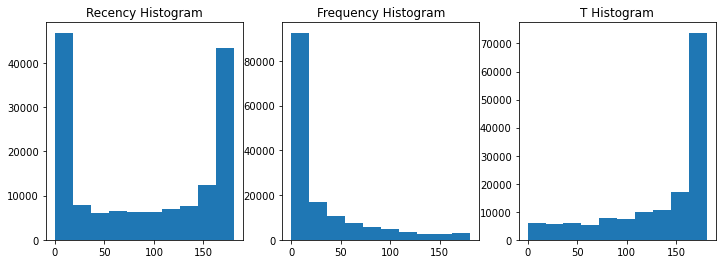

In [10]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(customer_rft['recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(customer_rft['frequency'])

ax3.set_title('T Histogram')
ax3.hist(customer_rft['T'])


plt.show()

## 왜도 확인

In [11]:
print('frequency -> skewness : ', customer_rft['frequency'].skew(), '/','kurtosis :' , customer_rft['frequency'].kurt())
print('recency -> skewness : ', customer_rft['recency'].skew(), '/', 'kurtosis :' , customer_rft['recency'].kurt())
print('T -> skewness : ', customer_rft['T'].skew(), '/', 'kurtosis :' , customer_rft['T'].kurt())

frequency -> skewness :  1.7784542746824021 / kurtosis : 2.401092829673408
recency -> skewness :  -0.047929696889224764 / kurtosis : -1.6934776906579203
T -> skewness :  -1.098662800843665 / kurtosis : -0.04347994682419598


In [14]:
# log변환

import numpy as np 
customer_rft['recency_log'] = np.log1p(customer_rft['recency'])
customer_rft['frequency_log'] = np.log1p(customer_rft['frequency'])
customer_rft['T_log'] = np.log1p(customer_rft['T'])


<ipython-input-14-399fabc8c38f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_rft['recency_log'] = np.log1p(customer_rft['recency'])
<ipython-input-14-399fabc8c38f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_rft['frequency_log'] = np.log1p(customer_rft['frequency'])
<ipython-input-14-399fabc8c38f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [15]:
print('frequency_log -> skewness : ', customer_rft['frequency_log'].skew(), '/','kurtosis :' , customer_rft['frequency_log'].kurt())
print('recency_log -> skewness : ', customer_rft['recency_log'].skew(), '/', 'kurtosis :' , customer_rft['recency_log'].kurt())
print('T_log -> skewness : ', customer_rft['T_log'].skew(), '/', 'kurtosis :' , customer_rft['T_log'].kurt())

frequency_log -> skewness :  0.062264095143294604 / kurtosis : -1.2981839139578297
recency_log -> skewness :  -0.8338072708975156 / kurtosis : -1.0003827097021292
T_log -> skewness :  -2.713739026496004 / kurtosis : 8.810912508397918


- log변환 후 skew값 확인 결과 frequency만 skew 감소하고 recency, T는 skew 증가
- 따라서, frequency만 log변환 진행

## Frequency 로그변환 후 히스토그램

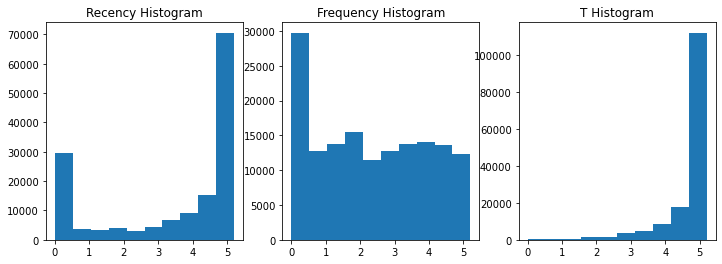

In [31]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(customer_rft['recency_log'])

ax2.set_title('Frequency Histogram')
ax2.hist(customer_rft['frequency_log'])

ax3.set_title('T Histogram')
ax3.hist(customer_rft['T_log'])


plt.show()

- frequency만 log변환 후 히스토그램

## KMeans clustering

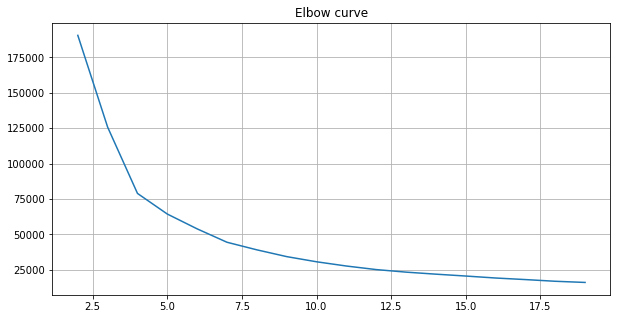

In [17]:
#로그 변환 및 standscaler 변환 이후
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


x_features = customer_rft[['recency_log', 'frequency_log', 'T_log']].values
x_features_scaled = StandardScaler().fit_transform(x_features)


#elbow curve 확인
distortions = []
for k in range(2,20):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x_features_scaled)
    distortions.append(kmeans.inertia_)
    
fig = plt.figure(figsize = (10,5))
plt.plot(range(2,20), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()



## 군집화 -> 실루엣 계수 그래프 및 군집결과 시각화

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
def visualize_kmeans_plot_multi(cluster_lists, X_features):
        
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*', 'p']
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
                        edgecolor='k', marker=markers[label], label=cluster_legend)
            axs[ind].set_title('Number of Cluster : '+ str(n_cluster))  
            axs[ind].legend(loc='upper right')
        
    plt.show()

In [ ]:
#시각화(frequency만 로그변환)
visualize_silhouette([2,3,4,5,6], x_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5,6], x_features_scaled)

#1시간걸림 이거

In [ ]:
#라벨링

kmeans = KMeans(n_clusters=3 , random_state=0)   #n_cluster 지정
labels = kmeans.fit_predict(x_features_scaled)

customer_df_new['cluster_label'] = labels
customer_df_new.head()
# print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(x_features_scaled, labels)))

- 시각화 결과는 'R,F,T로 군집 파일'에 저장되어있음
- 결과 labeling

# Lifetimes library
- 3개변수(Frequency, Recency, T)만으로 고객의 Lifetime value를 측정할 수 있는 라이브러리
- 고객에 대한 insight를 얻기 위한 용도로 사용

## BG/NBD model을 통한 basic frequency / recency 분석
- beta-geometric/negative binomial model for customer alive probability

- Frequency : 특정 고객이 구매를 한 날짜 수 - 1(반복 횟수의 개념이므로 -1)
- T : 연구 마지막날(2020-07-31) - 고객의 첫 구매날
- recency : 고객의 최근 구매날짜 - 첫 구매날짜
- monetary_value : 구매합계 / 총구매 수(frequency)

In [28]:
customer_rft.describe()

,frequency,recency,T,recency_log,frequency_log,T_log
count,150043.000000,150043.000000,150043.000000,150043.000000,150043.000000,150043.000000
mean,29.702312,90.128463,136.626954,3.465547,2.276210,4.764727
std,42.911829,73.161414,52.358193,2.034989,1.668936,0.733367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,107.000000,1.609438,0.693147,4.682131
50%,9.000000,95.000000,162.000000,4.564348,2.302585,5.093750
75%,41.000000,168.000000,179.000000,5.129899,3.737670,5.192957
max,181.000000,181.000000,181.000000,5.204007,5.204007,5.204007


In [23]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef = 0.001) #일반적으로 0.001~0.1 정도의 패널라이저가 효과적임
bgf.fit(customer_rft['frequency'], customer_rft['recency'], customer_rft['T'])
print(bgf)

bgf.summary


<lifetimes.BetaGeoFitter: fitted with 150043 subjects, a: 0.11, alpha: 1.96, b: 1.79, r: 0.49>


,coef,se(coef),lower 95% bound,upper 95% bound
r,0.488066,0.001850,0.484439,0.491692
alpha,1.962555,0.010748,1.941489,1.983621
a,0.108315,0.000914,0.106524,0.110106
b,1.785638,0.025768,1.735133,1.836142


- 파라미터값 => a: 0.11, alpha: 1.96, b: 1.79, r: 0.49

## Visualizing our Frequency / Recency matrix


C:\ProgramData\Anaconda3\lib\site-packages\lifetimes\fitters\beta_geo_fitter.py:256: RuntimeWarning: overflow encountered in double_scalars
  denominator = 1 + (x > 0) * (a / (b + x - 1)) * ((alpha + T) / (alpha + recency)) ** (r + x)


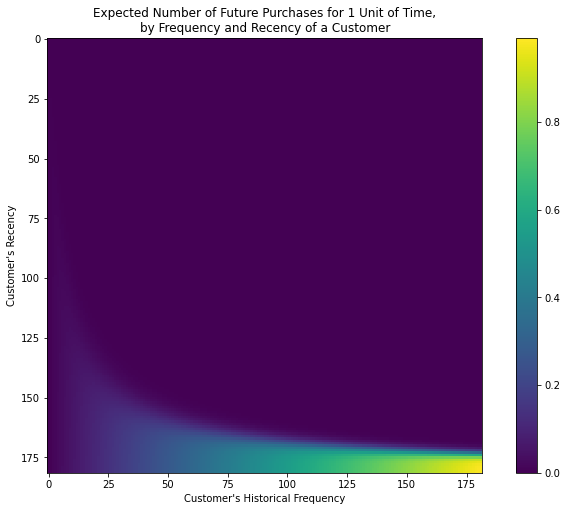

In [24]:
from lifetimes.plotting import plot_frequency_recency_matrix

fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

- 고객이 175회 구매했고, 마지막구매가 175일째라면 가장 best고객임(그래프의 오른쪽 하단)
- 가장 차가운 고객은 그래프의 오른쪽 상단(많이 구매했으나, recency가 매우 작아서 최근 구매가 없음)
- (15,125)정도 주위에 있는(꼬리 부분) 고객은 자주 구매하지 않음, 그러나 최근에 구매를 하긴 했으므로 다시 구매할 수도 있고 아닐 수도 있음

## 살아있을 확률(probability customer is alive)


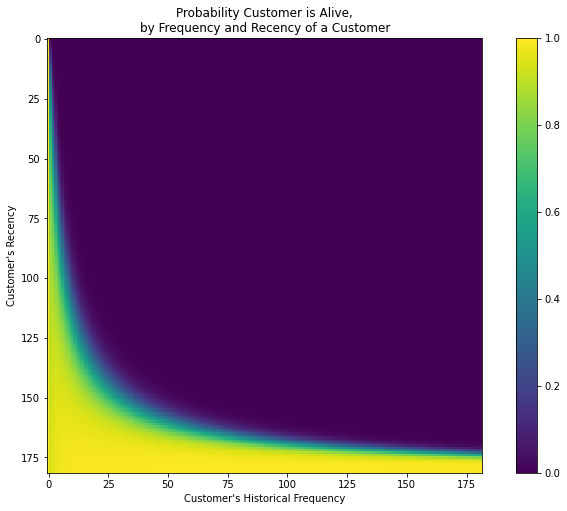

In [29]:
from lifetimes.plotting import plot_probability_alive_matrix

fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

- 최근에 구매한 고객들은 대부분 alive
- 많이 구매했지만, 최근이 아닌 고객은 dropped out 될 수 있음
- 더 과거에 구매했을 수록 dropped out 될 확률이 높아짐


# insight 도출
### Frequency x Recency matrix
- frequency가 높고, recency가 높을수록 => 즉, 반복 구매횟수가 많고, 구매 이력 기간이 길수록 충성고객이며,
- frequency가 높지만, recency가 매우 낮으면 => 즉, 반복 구매횟수는 여러번 있지만, 구매 이력 기간이 짧으면 차가운 고객이다.
- 꼬리부분(frequency 낮고, recency는 어느정도 높음) => 자주 구매하지는 않았지만, 구매이력 기간은 어느정도 됨 => 언제 이탈할지 모르는 고객

### 고객 생존 확률 그래프
- 최근에 구매한 고객들은 대부분 생존
- 많이 구매했지만, 최근이 아닌 고객(recency가 낮은 고객)은 이탈 가능성 높음